In [1]:
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

/home/ec1018/anaconda3/envs/atf/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [11]:
def to_rgb(img):
    '''https://github.com/keras-team/keras/issues/11208'''
    # img = img * 255
    # img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    # img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.float32)
    img_rgb = np.asarray(np.dstack((img, img, img)))
    return img_rgb

def set_to_rgb(t_set):
    rgb_list = []
    #convert x_train data to rgb values
    for i in range(len(t_set)):
        rgb = to_rgb(t_set[i])
        rgb_list.append(rgb)
        #print(rgb.shape)
        rgb_arr = np.stack([rgb_list],axis=4)
    rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
    return rgb_arr_to_3d

def get_test_angle_normal(all_test, angle, fgsm=False, debug=True):
    (x_test, y_test) = np.copy(all_test[str(angle)][0]), np.copy(all_test[str(angle)][1])
    # If we are using the saved fgsm images, those are already normalized
    if fgsm == False:
        if debug: print("Dividing by 255...")
        x_test *= (1.0/255)
    x_test = set_to_rgb(x_test)
    return (x_test, y_test)

In [12]:
# Load actual images
test_set_name = "greebles10_test_-90_90_1_224.npy".format(img_size)

render_folder = os.path.join(os.getcwd(), "..", "greebles_10") 
set_mode = 'specific_all'
set_type = 'specific_angle'
source_folder = os.path.join(render_folder, "greebles_tf-" + set_mode, set_type)
test_set_path = os.path.join(source_folder, test_set_name)
all_test = joblib.load(test_set_path)
labels = {0: 'f-1', 1: 'f-2', 2: 'f-3', 3: 'f-4', 4: 'f-5', 5: 'm-1', 6: 'm-2', 7: 'm-3', 8: 'm-4', 9: 'm-5'}

In [50]:
###### Choose the data to load ######

extra = 'rgb_none'
# extra = 'rgb_imagenet'

# extra = 'rgb_imagenet_noAT'
# extra = 'rgb_imagenet_AT'

# extra = 'rgb_imagenet_noAT2'
# extra = 'rgb_imagenet_AT2'

In [51]:
# Don't change any of these
img_size = 224
method_vis = ['saliency', 'gradcam']
method_vis_select = method_vis[1]
view_pred_class = [0, 1, 2, 'None'][0]

grads_filename = os.path.join("grad_data", "{}{}_{}_{}_{}.npy".format(method_vis_select, view_pred_class, img_size, extra, test_set_name.split('_')[1]))

print(grads_filename)

grad_data/gradcam0_224_rgb_none_test.npy


In [52]:
# Load gradcam data
all_grads = joblib.load(grads_filename)
print(all_grads.keys())
print("-"*15)
print(all_grads['0'].keys())

dict_keys(['-90', '-89', '-88', '-87', '-86', '-85', '-84', '-83', '-82', '-81', '-80', '-79', '-78', '-77', '-76', '-75', '-74', '-73', '-72', '-71', '-70', '-69', '-68', '-67', '-66', '-65', '-64', '-63', '-62', '-61', '-60', '-59', '-58', '-57', '-56', '-55', '-54', '-53', '-52', '-51', '-50', '-49', '-48', '-47', '-46', '-45', '-44', '-43', '-42', '-41', '-40', '-39', '-38', '-37', '-36', '-35', '-34', '-33', '-32', '-31', '-30', '-29', '-28', '-27', '-26', '-25', '-24', '-23', '-22', '-21', '-20', '-19', '-18', '-17', '-16', '-15', '-14', '-13', '-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', 

Dividing by 255...
0.0
0.9686274509803922


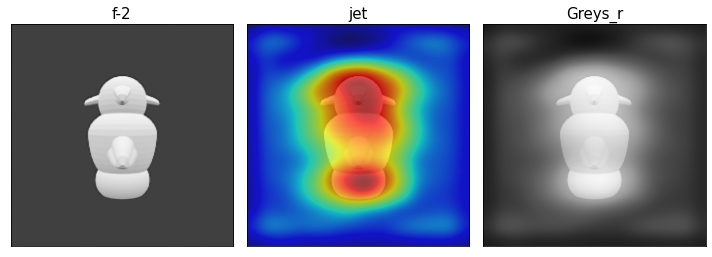

In [60]:
angle_used = 0
class_idx = 1

# Original Image
fig, ax = plt.subplots(1, 3, figsize=(10,6))
(x_test, y_test) = get_test_angle_normal(all_test, angle=angle_used)
indices = np.where(y_test[:, class_idx] == 1.)[0]
idx = indices[0]
ax[0].set_title(labels[class_idx], fontsize=15)
ax[0].imshow(x_test[idx], cmap='Greys_r')
ax[0].set_xticks([])
ax[0].set_yticks([])

# Debug
print(np.amin(x_test))
print(np.amax(x_test))

for i, cmap in enumerate(['jet', 'Greys_r']):
    grads = all_grads[str(angle_used)][class_idx]
    ax[i+1].set_title(cmap, fontsize=15)
    ax[i+1].imshow(grads, cmap=cmap)
    ax[i+1].imshow(x_test[idx], cmap='Greys_r', alpha=0.30)
    ax[i+1].set_xticks([])
    ax[i+1].set_yticks([])
# fig.suptitle('Grad-CAM', fontsize=15, fontweight ="bold")
plt.tight_layout()

plt.show()

In [61]:
# angle_used = 0
# class_idx = 0
# grads = all_grads[str(angle_used)][class_idx]
print(grads.shape)
display(grads)

(224, 224)


array([[0.03143151, 0.0318474 , 0.03304203, ..., 0.05905798, 0.05858254,
        0.058418  ],
       [0.03215848, 0.03257525, 0.03377246, ..., 0.05964039, 0.05916107,
        0.05899521],
       [0.03424157, 0.03466086, 0.03586542, ..., 0.06130808, 0.0608176 ,
        0.06064791],
       ...,
       [0.05469999, 0.05486672, 0.05535032, ..., 0.06403651, 0.06348874,
        0.06329836],
       [0.05299243, 0.05314931, 0.0536046 , ..., 0.06245494, 0.06193685,
        0.06175678],
       [0.05239543, 0.05254887, 0.05299429, ..., 0.06190323, 0.06139553,
        0.06121906]], dtype=float32)

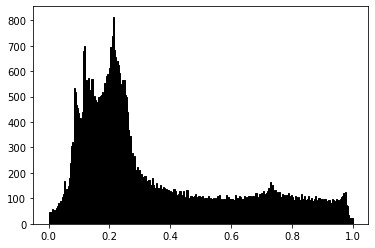

In [88]:
plt.hist(grads.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

In [63]:
# https://stats.stackexchange.com/questions/211377/skewness-and-kurtosis-in-an-image
# https://dsp.stackexchange.com/questions/30435/what-do-skewness-and-kurtosis-represent#:~:text=In%20digital%20image%20processing%20kurtosis,have%20a%20high%20kurtosis%20value.
# https://stats.stackexchange.com/questions/84158/how-is-the-kurtosis-of-a-distribution-related-to-the-geometry-of-the-density-fun
all_stats = [
    np.mean(grads),
    np.var(grads),
    skew(grads, axis=None),
    kurtosis(grads, axis=None)
]

print(all_stats)

[0.35029715, 0.06667599, 0.9622637629508972, -0.3276413086874128]


[0.5, 0.125, 0.0, -1.0]


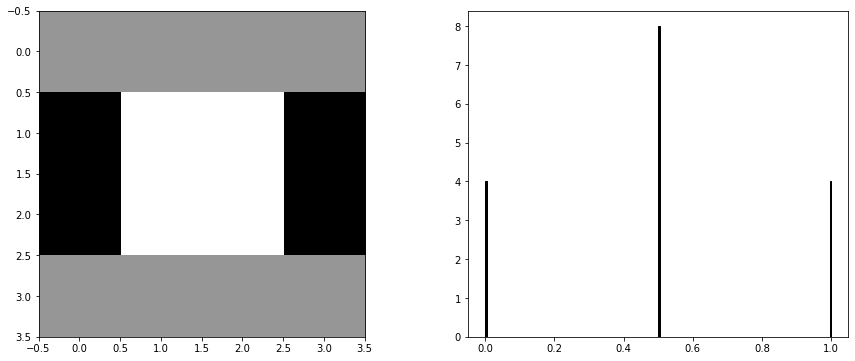

In [102]:
test_img = np.array([
    [0.5, 0.5, 0.5, 0.5],
    [0.0, 1.0, 1.0, 0.0],
    [0.0, 1.0, 1.0, 0.0],
    [0.5, 0.5, 0.5, 0.5]
])

all_stats = [
    np.mean(test_img),
    np.var(test_img),
    skew(test_img, axis=None),
    kurtosis(test_img, axis=None)
]

print(all_stats)
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].imshow(test_img, cmap='Greys_r')
ax[1].hist(test_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()